<a href="https://colab.research.google.com/github/dixitritik17/ritik/blob/master/BreastCancerDetectionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip breastcancer

Archive:  breastcancer.zip
   creating: breastcancer/
   creating: breastcancer/train/
   creating: breastcancer/train/beningn/
  inflating: breastcancer/train/beningn/Beningn1 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn1.jpg  
  inflating: breastcancer/train/beningn/Beningn10 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn10.jpg  
  inflating: breastcancer/train/beningn/Beningn11 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn11.jpg  
  inflating: breastcancer/train/beningn/Beningn12 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn12.jpg  
  inflating: breastcancer/train/beningn/Beningn13 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn13.jpg  
  inflating: breastcancer/train/beningn/Beningn14 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn14.jpg  
  inflating: breastcancer/train/beningn/Beningn15 - Copy.jpg  
  inflating: breastcancer/train/beningn/Beningn15.jpg  
  inflating: breastcancer/train/beningn/B

In [ ]:
train_path = "breastcancer/train"
val_path = "breastcancer/val"

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import*
from keras.models import*
from keras.preprocessing import image 

In [ ]:
model = Sequential()
inputSize = (224,224,3)
model.add(Conv2D(32, (3, 3), activation="relu",input_shape=inputSize))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='Adam', metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('breastcancer/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 64 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory('breastcancer/val',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 16 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
                                training_set,
                                steps_per_epoch=2,
                                epochs=7,
                                validation_data= validation_set,
                                validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
2/2 [==============================] - 23s 11s/step - loss: 1.1384 - accuracy: 0.5312 - val_loss: 1.1761 - val_accuracy: 0.5000
Epoch 2/7
2/2 [==============================] - 18s 9s/step - loss: 2.1008 - accuracy: 0.5312
Epoch 3/7
2/2 [==============================] - 18s 9s/step - loss: 0.7379 - accuracy: 0.5625
Epoch 4/7
2/2 [==============================] - 18s 9s/step - loss: 0.6909 - accuracy: 0.5521
Epoch 5/7
2/2 [==============================] - 18s 9s/step - loss: 0.6891 - accuracy: 0.5729
Epoch 6/7
2/2 [==============================] - 18s 9s/step - loss: 0.6979 - accuracy: 0.4792
Epoch 7/7
2/2 [==============================] - 18s 9s/step - loss: 0.6900 - accuracy: 0.6042


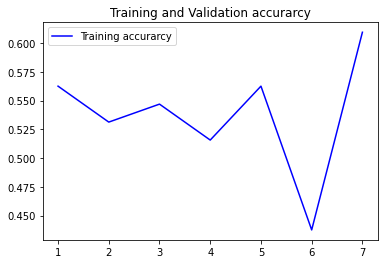

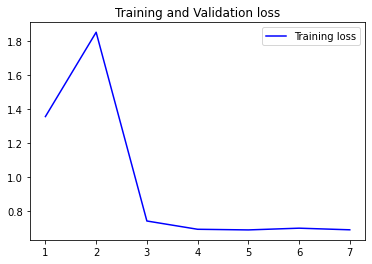

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
#plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
